In [1]:
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
import os
from sklearn import metrics

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Importing the feature engineered validation and train sets, in order to avoid all the preprocessing

In [3]:
train_final = pd.read_csv('train_after_engineering.csv', index_col=0) 
validation_final = pd.read_csv('validation_after_engineering.csv', index_col=0) 
test = pd.read_csv('test.csv')

## XGBoost

#### XGBoost training with best parameters we have already found in XGBoost_linear.ipynb file

In [4]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
                             max_depth=3, min_child_weight=1, missing=None, n_estimators=120,
                             n_jobs=3, nthread=None, objective='binary:logistic',
                             random_state=500, reg_alpha=1, reg_lambda=0.8, scale_pos_weight=1,
                             seed=None, silent=False, subsample=1, verbose=10)

In [5]:
train_final['adexchange'] = train_final['adexchange'].fillna(4)
X_xgb = train_final.drop(columns = ['bidprice', 'payprice', 'click']).astype(float)
y_xgb = train_final['click']  # Labels

validation_final['adexchange'] = validation_final['adexchange'].fillna(4)
X_v_xgb = validation_final.drop(columns = ['bidprice', 'payprice', 'click']).astype(float)
y_v_xgb = validation_final['click']


In [6]:
model_xgb.fit(X_xgb, y_xgb)
pred_xgb = model_xgb.predict(X_v_xgb)

print (metrics.classification_report(y_v_xgb, pred_xgb))
print (metrics.confusion_matrix(y_v_xgb, pred_xgb))
print ('PD XGBoost AU ROC (Hold out Set): ', metrics.roc_auc_score(y_v_xgb,  model_xgb.predict_proba(X_v_xgb)[:,1] ))

[23:42:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[23:42:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[23:42:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[23:42:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[23:42:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[23:42:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:38] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[23:42:39] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[23:42:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[23:42:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

In [7]:
predicted_XGB_CTR = model_xgb.predict_proba(X_v_xgb)[:,1]
predicted_XGB_CTR

array([0.0239841 , 0.01590747, 0.03889485, ..., 0.06182635, 0.03165899,
       0.04819798], dtype=float32)

#### Final recalibrated pCTRs

In [8]:
w = 0.0073 # class 0, downsampling rate
predicted_XGB_CTR = predicted_XGB_CTR/(predicted_XGB_CTR+((1-predicted_XGB_CTR)/w)) 

## ORTB 1 Bidding Strategy

Without Budget limit:  0.0 Num Clicks:  0 With Budget limit:  0.0 Num Clicks:  0 CTR:  0.0 won impressions:  80 c  0.0
Without Budget limit:  32.365 Num Clicks:  37 With Budget limit:  32.365 Num Clicks:  37 CTR:  0.007101727447216891 won impressions:  5210 c  3.344481605351171e-08
Without Budget limit:  67.59100000000001 Num Clicks:  46 With Budget limit:  67.59100000000001 Num Clicks:  46 CTR:  0.004765357919817673 won impressions:  9653 c  6.688963210702342e-08
Without Budget limit:  100.29100000000001 Num Clicks:  51 With Budget limit:  100.29100000000001 Num Clicks:  51 CTR:  0.003942181340341655 won impressions:  12937 c  1.0033444816053512e-07
Without Budget limit:  131.61900000000003 Num Clicks:  54 With Budget limit:  131.61900000000003 Num Clicks:  54 CTR:  0.003483196800619235 won impressions:  15503 c  1.3377926421404684e-07
Without Budget limit:  166.62200000000004 Num Clicks:  59 With Budget limit:  166.62200000000004 Num Clicks:  59 CTR:  0.003307545688978585 won impress

Without Budget limit:  1700.4450000000002 Num Clicks:  111 With Budget limit:  1700.4450000000002 Num Clicks:  111 CTR:  0.001493139628732849 won impressions:  74340 c  1.5050167224080269e-06
Without Budget limit:  1732.7500000000002 Num Clicks:  112 With Budget limit:  1732.7500000000002 Num Clicks:  112 CTR:  0.0014893617021276596 won impressions:  75200 c  1.5384615384615387e-06
Without Budget limit:  1766.4980000000005 Num Clicks:  112 With Budget limit:  1766.4980000000005 Num Clicks:  112 CTR:  0.0014729864800883791 won impressions:  76036 c  1.5719063545150504e-06
Without Budget limit:  1800.187 Num Clicks:  112 With Budget limit:  1800.187 Num Clicks:  112 CTR:  0.0014566452938651823 won impressions:  76889 c  1.605351170568562e-06
Without Budget limit:  1836.731 Num Clicks:  113 With Budget limit:  1836.731 Num Clicks:  113 CTR:  0.0014527782777506363 won impressions:  77782 c  1.6387959866220738e-06
Without Budget limit:  1872.2380000000003 Num Clicks:  113 With Budget limit:

Without Budget limit:  3140.9440000000004 Num Clicks:  135 With Budget limit:  3140.9440000000004 Num Clicks:  135 CTR:  0.0012893243940175349 won impressions:  104706 c  3.0100334448160537e-06
Without Budget limit:  3171.178 Num Clicks:  135 With Budget limit:  3171.178 Num Clicks:  135 CTR:  0.0012823800974608873 won impressions:  105273 c  3.043478260869566e-06
Without Budget limit:  3202.38 Num Clicks:  135 With Budget limit:  3202.38 Num Clicks:  135 CTR:  0.0012754861019255116 won impressions:  105842 c  3.0769230769230774e-06
Without Budget limit:  3229.9530000000004 Num Clicks:  136 With Budget limit:  3229.9530000000004 Num Clicks:  136 CTR:  0.0012788084514193834 won impressions:  106349 c  3.110367892976589e-06
Without Budget limit:  3258.4620000000004 Num Clicks:  136 With Budget limit:  3258.4620000000004 Num Clicks:  136 CTR:  0.0012725860633111567 won impressions:  106869 c  3.1438127090301007e-06
Without Budget limit:  3289.6600000000008 Num Clicks:  136 With Budget lim

Without Budget limit:  4457.736000000001 Num Clicks:  146 With Budget limit:  4457.736000000001 Num Clicks:  146 CTR:  0.0011467439540674067 won impressions:  127317 c  4.48160535117057e-06
Without Budget limit:  4484.729 Num Clicks:  146 With Budget limit:  4484.729 Num Clicks:  146 CTR:  0.0011427766341314506 won impressions:  127759 c  4.515050167224081e-06
Without Budget limit:  4515.5470000000005 Num Clicks:  147 With Budget limit:  4515.5470000000005 Num Clicks:  147 CTR:  0.0011462882096069868 won impressions:  128240 c  4.548494983277593e-06
Without Budget limit:  4542.302 Num Clicks:  148 With Budget limit:  4542.302 Num Clicks:  148 CTR:  0.0011501488199317682 won impressions:  128679 c  4.5819397993311045e-06
Without Budget limit:  4570.091000000001 Num Clicks:  148 With Budget limit:  4570.091000000001 Num Clicks:  148 CTR:  0.0011460519285421136 won impressions:  129139 c  4.615384615384616e-06
Without Budget limit:  4598.2480000000005 Num Clicks:  149 With Budget limit:  

Without Budget limit:  5750.691000000001 Num Clicks:  158 With Budget limit:  5750.691000000001 Num Clicks:  158 CTR:  0.0010718040904928263 won impressions:  147415 c  6.0200668896321075e-06
Without Budget limit:  5779.341999999999 Num Clicks:  158 With Budget limit:  5779.341999999999 Num Clicks:  158 CTR:  0.0010687807781806374 won impressions:  147832 c  6.05351170568562e-06
Without Budget limit:  5808.148 Num Clicks:  158 With Budget limit:  5808.148 Num Clicks:  158 CTR:  0.0010656019639448855 won impressions:  148273 c  6.086956521739132e-06
Without Budget limit:  5836.237000000001 Num Clicks:  158 With Budget limit:  5836.237000000001 Num Clicks:  158 CTR:  0.0010627135516155935 won impressions:  148676 c  6.120401337792643e-06
Without Budget limit:  5864.139000000001 Num Clicks:  158 With Budget limit:  5864.139000000001 Num Clicks:  158 CTR:  0.001059798101754033 won impressions:  149085 c  6.153846153846155e-06
Without Budget limit:  5890.352000000001 Num Clicks:  159 With B

Without Budget limit:  6873.142000000001 Num Clicks:  162 With Budget limit:  6249.999000000001 Num Clicks:  142 CTR:  0.000954525594057742 won impressions:  148765 c  7.491638795986623e-06
Without Budget limit:  6895.6410000000005 Num Clicks:  162 With Budget limit:  6249.936000000001 Num Clicks:  142 CTR:  0.0009558813630060449 won impressions:  148554 c  7.5250836120401346e-06
Without Budget limit:  6920.846000000003 Num Clicks:  162 With Budget limit:  6249.9990000000025 Num Clicks:  142 CTR:  0.000957273254324583 won impressions:  148338 c  7.558528428093646e-06
Without Budget limit:  6948.724 Num Clicks:  162 With Budget limit:  6249.985999999999 Num Clicks:  141 CTR:  0.0009519437205471313 won impressions:  148118 c  7.591973244147159e-06
Without Budget limit:  6975.585000000001 Num Clicks:  163 With Budget limit:  6249.940000000001 Num Clicks:  141 CTR:  0.0009535854135246816 won impressions:  147863 c  7.62541806020067e-06
Without Budget limit:  6996.679000000003 Num Clicks:  

Without Budget limit:  7879.381 Num Clicks:  166 With Budget limit:  6249.983 Num Clicks:  130 CTR:  0.0009228628625786208 won impressions:  140866 c  8.96321070234114e-06
Without Budget limit:  7901.905000000001 Num Clicks:  166 With Budget limit:  6249.996000000001 Num Clicks:  129 CTR:  0.0009167140420693576 won impressions:  140720 c  8.99665551839465e-06
Without Budget limit:  7927.803000000002 Num Clicks:  166 With Budget limit:  6249.981000000002 Num Clicks:  129 CTR:  0.0009180122543961401 won impressions:  140521 c  9.030100334448162e-06
Without Budget limit:  7951.0779999999995 Num Clicks:  166 With Budget limit:  6249.938999999999 Num Clicks:  129 CTR:  0.000919150391529566 won impressions:  140347 c  9.063545150501673e-06
Without Budget limit:  7976.215000000001 Num Clicks:  166 With Budget limit:  6249.920000000001 Num Clicks:  129 CTR:  0.0009202519635608757 won impressions:  140179 c  9.096989966555186e-06
Without Budget limit:  8001.085000000001 Num Clicks:  166 With Bu

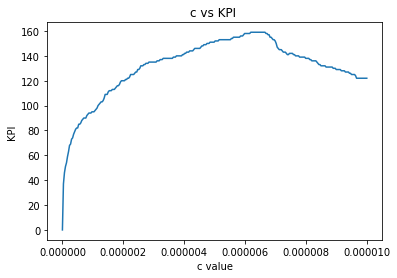

Optimal c is:  6.1872909698996665e-06 , Optimal num clicks:  159 , impressions: 149478
budget spent: 5890.352000000001 , avgCPM: 39.40614672393262 , avgCPC: 37.046238993710695
CTR:  0.10637016818528479 %


In [9]:
budget = 6250
optimal_basebid = 0
optimal_num_clicks = 0
num_won_auctions = 0
base_bids_array = []
num_clicks_array = []

lambda_ortb = 5.2e-7 
avg_ctr = 7.375e-04 


# Line search to find optimal constant variable c, with fixed λ
for bid in np.linspace(0.0, 0.00001, 300):
    validation_final['bid'] = np.sqrt( ((bid/lambda_ortb)*predicted_XGB_CTR) + np.square(bid)) - bid
    
    Won_Auctions = validation_final[ (validation_final['bid'] >= validation_final['slotprice']) & (validation_final['bid'] >=validation_final['payprice']) ]
    exceeding_indexes = np.flatnonzero( (Won_Auctions['payprice'].cumsum().values) > budget  )
    
    # Budget exceeded
    if len(exceeding_indexes) > 0:
        # Gives the first index as soon as the sum of the payprice exceeds the budget
        ExceedBudget_Index = exceeding_indexes[0]
        # Only consider the won auctions UP to ExceedBudget_Index
        num_clicks = Won_Auctions[:ExceedBudget_Index]['click'].sum()
        budget_spent = Won_Auctions[:ExceedBudget_Index]['payprice'].sum()
        num_won_auctions = len(Won_Auctions[:ExceedBudget_Index])
    
    # No budget exceeded
    else:
        num_clicks = Won_Auctions[:]['click'].sum()
        budget_spent = Won_Auctions[:]['payprice'].sum()
        num_won_auctions = len(Won_Auctions[:])
    
    # Max clicks achieved --> optimal c
    if num_clicks > optimal_num_clicks:
        optimal_basebid = bid
        optimal_num_clicks = num_clicks
        optimal_impressions = num_won_auctions
        opt_budget = budget_spent
    
    print ('Without Budget limit: ', Won_Auctions['payprice'].sum(), 'Num Clicks: ',Won_Auctions['click'].sum() , 
           'With Budget limit: ', budget_spent, "Num Clicks: ", num_clicks , 
           "CTR: ", num_clicks/num_won_auctions, 'won impressions: ', num_won_auctions , "c ", bid)
    
    base_bids_array.append(bid)
    num_clicks_array.append(num_clicks)


# bids vs number of clicks, plot
plt.plot(base_bids_array, num_clicks_array)
plt.xlabel("c value")
plt.ylabel("KPI")
plt.title("c vs KPI ")
plt.show()


avgCPM = (opt_budget/optimal_impressions)*1000
avgCPC = (opt_budget/optimal_num_clicks)

optimal_bids = np.sqrt( ((optimal_basebid/lambda_ortb)*predicted_XGB_CTR) + np.square(optimal_basebid)) - optimal_basebid


print ("Optimal c is: ", optimal_basebid, ", Optimal num clicks: ", optimal_num_clicks, ', impressions:', optimal_impressions)
print('budget spent:', opt_budget , ', avgCPM:', avgCPM, ', avgCPC:', avgCPC)
print('CTR: ' , (optimal_num_clicks/optimal_impressions)*100, '%')

## Optimal bids for the validation set


In [17]:
optimal_bids = optimal_bids * 1000
aaa = pd.DataFrame(optimal_bids)
aaa.to_csv('optimalbids_validation_ortb1.csv')

## Optimal bids for the test set

Similar steps of feature engineering must take place

In [10]:
def preprocess_df(df):

    
    #---real price-----    
    if 'bidprice' and 'payprice' in df.columns:
        df['bidprice'] = df['bidprice'].apply( lambda x: x/1000.0 )
        df['payprice'] = df['payprice'].apply( lambda x: x/1000.0 )
       
        
    #---slot area-----  
    df['slot_area']=df['slotwidth'] * df['slotheight'] 
    
    #----real price---   
    df['slotprice'] = df['slotprice'].apply( lambda x: x/1000.0 )
    
    
    # ----browser/OS splitting--    
    df['OS'] = df['useragent'].apply( lambda x: x.split('_')[0] )
    df['browser'] = df['useragent'].apply( lambda x: x.split('_')[1] ) 
    df['OS'] = df['OS'].astype('category')
    df['browser'] = df['browser'].astype('category')
    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
    
    
    df['advertiser'] = df['advertiser'].astype('category')
    df['adexchange'] = df['adexchange'].astype('category')
    df['city'] = df['city'].astype('category')
    df['region'] = df['region'].astype('category')
    df['weekday'] = df['weekday'].astype('category')

    return df   
        

def tag(df):
    df['usertag'] = df['usertag'].apply(lambda x: str(x).split(','))
    
    AllTags = np.array(df['usertag'])
    Tags = [tag for usertags in AllTags for tag in usertags]
    Tags = list(set(Tags))
    
    for t in Tags:
        df['usertag_' + t] = df['usertag'].apply(lambda x: int(t in x))
    
    return df


In [11]:
test_final = preprocess_df(test)
test_final = tag(test)

In [12]:
# Dropping the same columns as before, except for bidid
test_final = test_final.drop(columns = ['usertag', 'useragent', 'slotheight', 'slotwidth','urlid','IP', 'domain', 'url','slotid', 'keypage','userid', 'creative', 'slotvisibility','slotformat'])

In [13]:
test_final.shape

(303375, 80)

In [14]:
test_final_final = pd.DataFrame(0, index=range(0,len(test_final)), columns=list( train_final.columns ))

for col in train_final:
    if col in test_final:
        test_final_final[col] = np.array( test_final[col] )

In [15]:
test_final_final.shape

(303375, 80)

In [16]:
test_final_final['adexchange'] = test_final_final['adexchange'].fillna(4)
X_test = test_final_final.astype(float)
X_test = X_test.drop(columns = ['bidprice', 'payprice', 'click'])

test_pred = model_xgb.predict(X_test)

#### pCTR for the test set

In [17]:
test_pCTR = model_xgb.predict_proba(X_test)[:,1]
test_pCTR

array([0.15464635, 0.25799447, 0.01843025, ..., 0.01211043, 0.14158835,
       0.01245131], dtype=float32)

#### Recalibration of the pCTR

In [18]:
test_pCTR_final = test_pCTR/(test_pCTR+((1-test_pCTR)/w)) 
test_pCTR_final

array([1.3336581e-03, 2.5317755e-03, 1.3704824e-04, ..., 8.9481917e-05,
       1.2026303e-03, 9.2032140e-05], dtype=float32)

In [19]:
final_bids = np.sqrt( ((optimal_basebid/lambda_ortb)*test_pCTR_final) + np.square(optimal_basebid)) - test_pCTR_final

In [20]:
bbb = test[['bidid']]
bbb['bidprice'] = final_bids*1000
bbb.to_csv('Group_14_ortb1.csv', index=False)

C:\Users\apogn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
